In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Set the paths
train_dir = './dataset/train'
val_dir = './dataset/val'
test_dir = './dataset/test'

# ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow images from the directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical'
)

# Load the DenseNet121 model without the top classification layers
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(7, activation='softmax')(x)  # Adjust for your number of categories

# Create the model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=40,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test accuracy: {test_acc}')



2024-10-09 19:53:37.647433: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-09 19:53:37.655565: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-09 19:53:37.665323: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-09 19:53:37.668183: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-09 19:53:37.675577: I tensorflow/core/platform/cpu_feature_guar

Found 1232 images belonging to 7 classes.
Found 310 images belonging to 7 classes.
Found 522 images belonging to 7 classes.


I0000 00:00:1728483818.706974    8817 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728483818.728820    8817 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728483818.728948    8817 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728483818.729674    8817 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/40


/home/shashank-jangde/Data/major/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1728483829.388543   11262 service.cc:146] XLA service 0x71153c08a1b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728483829.388562   11262 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2024-10-09 19:53:49.561642: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-09 19:53:50.723773: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuD

  4/154 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.3307 - loss: 5.6387 

I0000 00:00:1728483841.207737   11262 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


154/154 ━━━━━━━━━━━━━━━━━━━━ 31s 88ms/step - accuracy: 0.4848 - loss: 3.6630 - val_accuracy: 0.7303 - val_loss: 0.8278
Epoch 2/40


2024-10-09 19:54:14.636371: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-09 19:54:14.636497: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
/home/shashank-jangde/anaconda3/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.7628
Epoch 3/40


2024-10-09 19:54:25.027889: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.6619 - loss: 1.0738 - val_accuracy: 0.7237 - val_loss: 0.7344
Epoch 4/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8333 - val_loss: 0.7026
Epoch 5/40


2024-10-09 19:54:34.723051: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.6590 - loss: 1.0570 - val_accuracy: 0.7566 - val_loss: 0.6999
Epoch 6/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.8817
Epoch 7/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.6639 - loss: 0.9357 - val_accuracy: 0.7763 - val_loss: 0.6442
Epoch 8/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 192us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.9215
Epoch 9/40


2024-10-09 19:54:54.199474: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.6782 - loss: 0.9192 - val_accuracy: 0.7993 - val_loss: 0.6260
Epoch 10/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.1561
Epoch 11/40


2024-10-09 19:55:03.984545: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 18219901301422828555


154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.6935 - loss: 0.8831 - val_accuracy: 0.7895 - val_loss: 0.5861
Epoch 12/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 190us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8333 - val_loss: 0.8567
Epoch 13/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.6935 - loss: 0.8815 - val_accuracy: 0.7829 - val_loss: 0.6087
Epoch 14/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 176us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.5832
Epoch 15/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.7028 - loss: 0.8842 - val_accuracy: 0.7730 - val_loss: 0.6041
Epoch 16/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8333 - val_loss: 0.3382
Epoch 17/40


2024-10-09 19:55:34.035751: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.7141 - loss: 0.8079 - val_accuracy: 0.7730 - val_loss: 0.6595
Epoch 18/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8333 - val_loss: 0.3041
Epoch 19/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.7200 - loss: 0.7910 - val_accuracy: 0.8224 - val_loss: 0.5438
Epoch 20/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 175us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8333 - val_loss: 0.2810
Epoch 21/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.7406 - loss: 0.7188 - val_accuracy: 0.8026 - val_loss: 0.5253
Epoch 22/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 190us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.3225
Epoch 23/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.7388 - loss: 0.7421 - val_accuracy: 0.8191 - val_loss: 0.5737
Epoch 24/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step - accuracy: 0.00

2024-10-09 19:56:53.902295: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.7469 - loss: 0.7379 - val_accuracy: 0.8553 - val_loss: 0.4550
Epoch 34/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.3671
Epoch 35/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.7395 - loss: 0.7416 - val_accuracy: 0.8125 - val_loss: 0.5388
Epoch 36/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 195us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8333 - val_loss: 0.3548
Epoch 37/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.7497 - loss: 0.6992 - val_accuracy: 0.8717 - val_loss: 0.4395
Epoch 38/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8333 - val_loss: 0.9252
Epoch 39/40


2024-10-09 19:57:23.641198: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 18219901301422828555
2024-10-09 19:57:23.641264: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 4172252715613517361


154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.7716 - loss: 0.6695 - val_accuracy: 0.8651 - val_loss: 0.4591
Epoch 40/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8333 - val_loss: 0.3882
 1/65 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.6250 - loss: 1.2430

2024-10-09 19:57:33.583304: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 4172252715613517361


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7691 - loss: 0.7097
Test accuracy: 0.807692289352417


In [2]:
# Unfreeze the top layers of the model for fine-tuning
for layer in base_model.layers[-4:]:  # Unfreeze the last 4 layers, adjust as needed
    layer.trainable = True

# Re-compile the model with a lower learning rate
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fine-tune the model
history_finetune = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)


Epoch 1/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 22s 82ms/step - accuracy: 0.7180 - loss: 0.7991 - val_accuracy: 0.8651 - val_loss: 0.4464
Epoch 2/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0563
Epoch 3/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.7598 - loss: 0.6627 - val_accuracy: 0.8750 - val_loss: 0.4244
Epoch 4/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.9468
Epoch 5/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.7704 - loss: 0.6524 - val_accuracy: 0.8717 - val_loss: 0.4374
Epoch 6/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 198us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.1412
Epoch 7/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.7734 - loss: 0.6577 - val_accuracy: 0.8750 - val_loss: 0.4397
Epoch 8/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step - accuracy: 0

In [3]:
model.save("densenet_model.keras")

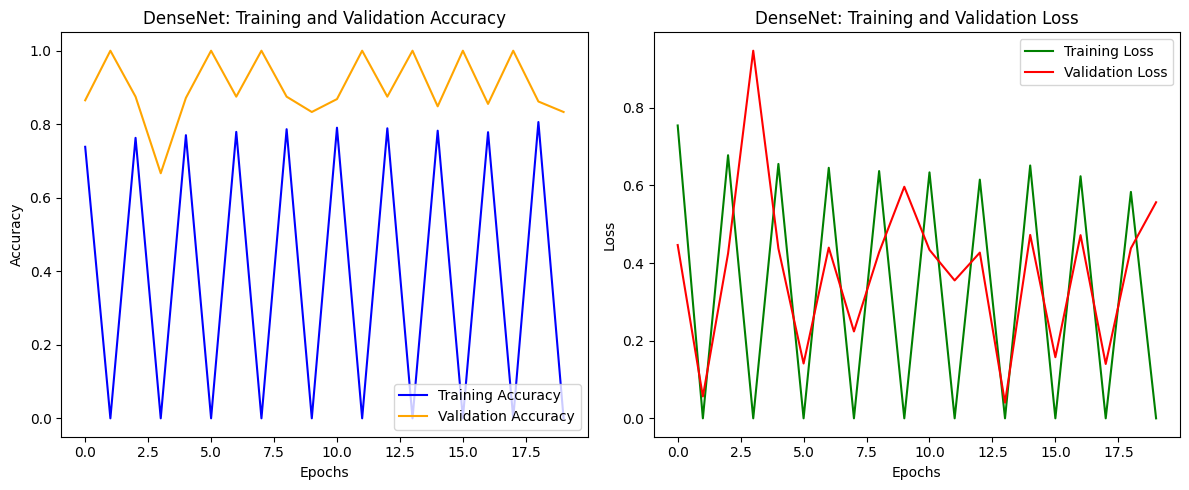

In [4]:
import matplotlib.pyplot as plt

# Assuming you have the history object for DenseNet training
# Replace 'history' with the appropriate variable name if different
densenet_history = history_finetune  # If you fine-tuned DenseNet, use that history

# Plot accuracy and loss over epochs
acc = densenet_history.history['accuracy']
val_acc = densenet_history.history['val_accuracy']
loss = densenet_history.history['loss']
val_loss = densenet_history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

# Plotting Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', color='blue')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='orange')
plt.legend(loc='lower right')
plt.title('DenseNet: Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', color='green')
plt.plot(epochs_range, val_loss, label='Validation Loss', color='red')
plt.legend(loc='upper right')
plt.title('DenseNet: Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()
